In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <h1 style='background:#4686C8; border:0; color:#5CE1E6'><center>SUDOKU PUZZLE </center></h1>

For this project, I am going to solve a sudoku puzzle from an image of an unsolved puzzle.

![Green and Blue Illustrative Technology Business Plan Presentation (3).png](attachment:6b11dbd1-adc1-4987-8934-8f18e37d2cc6.png)

The project is divided into three parts

**Part One: Digit Classification Model**

Build and train a neural network on the Chars74K image dataset for digits. This will be further used in classifying the digits in the image.

**Part Two: Detecting And Reading The Sudoku From An Image**

Identify the sudoku puzzle in an image using OpenCV-library.
Classify the digits in the detected sudoku puzzle using the model made in part one.
Getting the values of the cells in the sudoku in for of array.

**Part Three: Solving The Puzzle**

The array is converted into matrix.
The given puzzle is are solved using recursion.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:#4686C8; border:0; color:#5CE1E6'><center>TABLE OF CONTENTS</center></h1>

[1. IMPORTING LIBRARIES](#1)
    
[2. PART ONE: DIGIT CLASSIFICATION MODEL](#2)    

[3. LOADING DATA](#3)        

[4. SPLITTING DATASET](#4)

[5. MODEL BUILDING](#5)

[6. PART TWO: READING THE SUDOKU PUZZLE](#6)
    
[7. DETECTING CONTOUR](#7)    

[8. SPLITTING THE CELLS AND CLASSIFYING DIGITS](#8)        

[9. PART THREE: SOLVING THE SUDOKU](#9)

[10. END](#10)
    
    
 <a id="1"></a>
# **<span style="color:#4686C8;">IMPORTING LIBRARIES</span>**


In [ ]:
#Loading Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image

![Green and Blue Illustrative Technology Business Plan Presentation (4).png](attachment:ba7e78b7-addc-4121-8b1b-4c1bb50ddcf7.png)

 <h1 style='background:#4686C8; border:0; color:#5CE1E6'><center>PART ONE</center></h1>

<a id="2"></a>
# **<span style="color:#4686C8;">DIGIT CLASSIFICATION MODEL</span>**

**In this section:**

* Loading Data
* Splitting The Test Train And Validation Sets
* Preprocessing The Data
* Model Building And Training

<a id="3"></a>
# **<span style="color:#4686C8;">LOADING DATA</span>**

The dataset of images is used for building a suitable model to classify numbers in an image. Data is then specified as features(the image) and labels(the tags).

In [ ]:
aug_train = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,   # randomly flip images
        rescale=1/255)

In [ ]:
aug_train_dataset0 = aug_train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/myResearch/input/digits/Digits",
                                          target_size=(28, 28),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 10170 images belonging to 10 classes.


In [ ]:
type(aug_train_dataset0)

keras.src.preprocessing.image.DirectoryIterator

In [ ]:
#Loading the data

data = os.listdir("/content/drive/MyDrive/Colab Notebooks/myResearch/input/digits/Digits" )
# print(data)
data_X = []
data_y = []
data_classes = len(data)
for i in range (0,data_classes):
  data_list = os.listdir("/content/drive/MyDrive/Colab Notebooks/myResearch/input/digits/Digits" +"/"+str(i))
  # print(data_list)
  for j in data_list:
    # print(j)
    pic = cv2.imread("/content/drive/MyDrive/Colab Notebooks/myResearch/input/digits/Digits" +"/"+str(i)+"/"+j)
    pic = cv2.resize(pic, dsize=(28,28))
    data_X.append(pic)
    data_y.append(i)


if len(data_X) == len(data_y) :
  print("Total Dataponits = ",len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Dataponits =  10170


<a id="4"></a>
# **<span style="color:#4686C8;">SPLITTING DATASET</span>**

Splitting the dataset into test, train and validation sets. Preprocessing for the features (images) into grayscale, enhancing it with histogram equalization and then normalizing. Followed by converting then into a NumPy array. further reshaping the image's array and using data augmentation. Preprocessing for the labels involves one-hot encoding the label classes

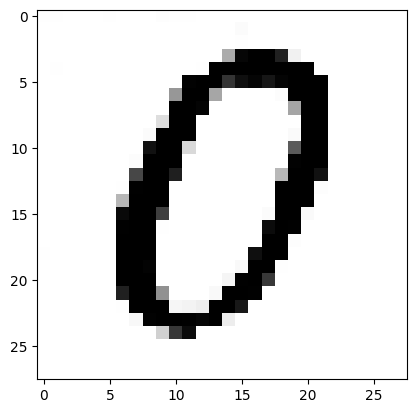

In [ ]:
data2 = os.listdir("/content/drive/MyDrive/Colab Notebooks/myResearch/input/make_digit" )
data2_classes = len(data2)
for i in range (0,1):
  data2_list = os.listdir("/content/drive/MyDrive/Colab Notebooks/myResearch/input/make_digit" +"/make_digit_"+str(i))
  j = data2_list[0]
  pic = cv2.imread("/content/drive/MyDrive/Colab Notebooks/myResearch/input/make_digit" +"/make_digit_"+str(i)+"/"+j)
  pic = 255 - pic
plt.figure()
plt.imshow(pic)
plt.show()

In [ ]:
data2 = os.listdir("/content/drive/MyDrive/Colab Notebooks/myResearch/input/make_digit" )
data2_X = []
data2_y = []
data2_classes = len(data2)
for i in range (0,data2_classes):
  data2_list = os.listdir("/content/drive/MyDrive/Colab Notebooks/myResearch/input/make_digit" +"/make_digit_"+str(i))
  for j in data2_list:
    pic = cv2.imread("/content/drive/MyDrive/Colab Notebooks/myResearch/input/make_digit" +"/make_digit_"+str(i)+"/"+j)
    pic = 255 - pic
    data2_X.append(pic)
    data2_y.append(i)
if len(data2_X) == len(data2_y) :
  print("Total Dataponits = ",len(data2_X))


Total Dataponits =  1650


In [ ]:
#Spliting the train validation and test sets
_, data_X2, _, data_y2 = train_test_split(data_X,data_y,test_size=0.1, random_state = 5)
train_X, test_X, train_y, test_y = train_test_split(data_X2,data_y2,test_size=0.05, random_state = 5)

# train_X = list(train_X)
# train_y = list(train_y)
# for i in range(len(data2_X)):
#   train_X.append(data2_X[i])
#   train_y.append(data2_y[i])
# train_X = np.array(train_X)
# train_y = np.array(train_y)

train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2, random_state = 3)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)
print("총 데이터 개수 = " + str(train_X.shape[0] + valid_X.shape[0] + test_X.shape[0]))
data_len = train_X.shape[0]

Training Set Shape =  (772, 28, 28, 3)
Validation Set Shape =  (194, 28, 28, 3)
Test Set Shape =  (51, 28, 28, 3)
총 데이터 개수 = 1017


In [ ]:
# Preprocessing the images for neuralnet

def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #making image grayscale
    img = cv2.equalizeHist(img) #Histogram equalization to enhance contrast
    img = img/255 #normalizing
    return img

train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

#Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [ ]:
# One hot encoding of the labels

train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

<a id="5"></a>
# **<span style="color:#4686C8;">MODEL BUILDING</span>**

**For the model, I will build a convolutional neural network.**
* Initialising the Convnet
* Defining by adding layers
* Compiling the Convnet
* Train the Convnet

In [ ]:
#Creating a Neural Network

model = Sequential()

model.add((Conv2D(60,(5,5),input_shape=(28, 28, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_49 (Conv2D)          (None, 28, 28, 60)        90060     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 60)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 14, 14, 30)        16230     
                                                                 
 conv2d_51 (Conv2D)          (None, 14, 14, 30)        8130      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 7, 7, 30)          0         
 ng2D)                                               

In [ ]:
data_len

2092

In [ ]:
def modelplot(history, data, val_data):
  plt.plot(history.history[data])
  plt.plot(history.history[val_data])
  plt.title('Model'+ data)
  plt.ylabel(data)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

In [ ]:
#Compiling the model

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon = 1e-08, weight_decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

#Fit the model

history2 = model.fit(train_X, train_y, batch_size=32, epochs = 30, validation_data = (valid_X, valid_y), verbose = 2, steps_per_epoch=65)

Epoch 1/30
65/65 - 3s - loss: 1.0040 - accuracy: 0.6587 - val_loss: 0.1883 - val_accuracy: 0.9542 - 3s/epoch - 40ms/step
Epoch 2/30
65/65 - 1s - loss: 0.2112 - accuracy: 0.9364 - val_loss: 0.0964 - val_accuracy: 0.9733 - 516ms/epoch - 8ms/step
Epoch 3/30
65/65 - 0s - loss: 0.1371 - accuracy: 0.9602 - val_loss: 0.0563 - val_accuracy: 0.9866 - 498ms/epoch - 8ms/step
Epoch 4/30
65/65 - 1s - loss: 0.0970 - accuracy: 0.9689 - val_loss: 0.1007 - val_accuracy: 0.9752 - 521ms/epoch - 8ms/step
Epoch 5/30
65/65 - 1s - loss: 0.0832 - accuracy: 0.9757 - val_loss: 0.0414 - val_accuracy: 0.9866 - 592ms/epoch - 9ms/step
Epoch 6/30
65/65 - 1s - loss: 0.0588 - accuracy: 0.9816 - val_loss: 0.0390 - val_accuracy: 0.9905 - 601ms/epoch - 9ms/step
Epoch 7/30
65/65 - 1s - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0468 - val_accuracy: 0.9866 - 543ms/epoch - 8ms/step
Epoch 8/30
65/65 - 0s - loss: 0.0485 - accuracy: 0.9869 - val_loss: 0.0614 - val_accuracy: 0.9790 - 464ms/epoch - 7ms/step
Epoch 9/30
65/65 -

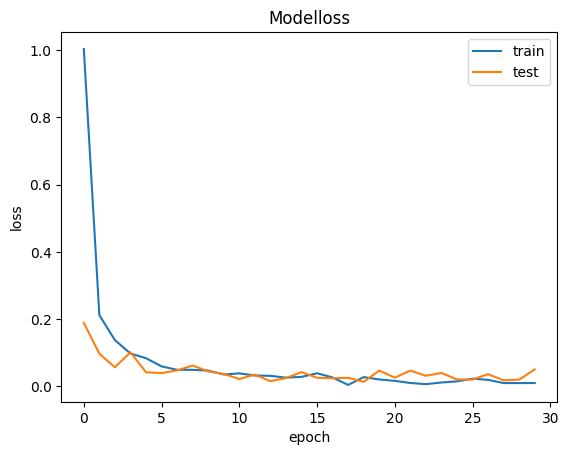

In [ ]:
modelplot(history2, 'loss', 'val_loss')

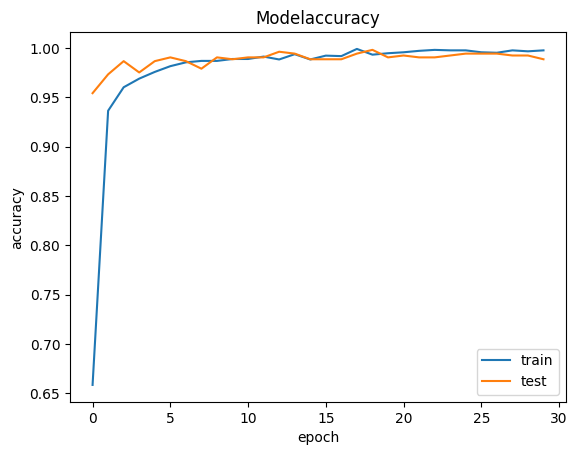

In [ ]:
modelplot(history2, 'accuracy', 'val_accuracy')

In [ ]:
# Testing the model on the test set

score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.22906085848808289
Test Accuracy = 0.9607843160629272


In [ ]:
#Creating a Neural Network

model = Sequential()

model.add((Conv2D(60,(5,5),input_shape=(28, 28, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


In [ ]:
#Compiling the model

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon = 1e-08, weight_decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

#Fit the model

history = model.fit(train_X, train_y, batch_size=32,
                              epochs = 30, validation_data = (valid_X, valid_y),
                              verbose = 2, steps_per_epoch= int(data_len/30)-1)

Epoch 1/30
24/24 - 3s - loss: 2.3249 - accuracy: 0.1354 - val_loss: 2.0532 - val_accuracy: 0.4175 - 3s/epoch - 124ms/step
Epoch 2/30
24/24 - 0s - loss: 1.2617 - accuracy: 0.5743 - val_loss: 0.5086 - val_accuracy: 0.8196 - 208ms/epoch - 9ms/step
Epoch 3/30
24/24 - 0s - loss: 0.6231 - accuracy: 0.8108 - val_loss: 0.1961 - val_accuracy: 0.9433 - 239ms/epoch - 10ms/step
Epoch 4/30
24/24 - 0s - loss: 0.3112 - accuracy: 0.8770 - val_loss: 0.3068 - val_accuracy: 0.8660 - 233ms/epoch - 10ms/step
Epoch 5/30
24/24 - 0s - loss: 0.2795 - accuracy: 0.9054 - val_loss: 0.1725 - val_accuracy: 0.9330 - 270ms/epoch - 11ms/step
Epoch 6/30
24/24 - 0s - loss: 0.2085 - accuracy: 0.9392 - val_loss: 0.1194 - val_accuracy: 0.9588 - 226ms/epoch - 9ms/step
Epoch 7/30
24/24 - 0s - loss: 0.1646 - accuracy: 0.9473 - val_loss: 0.1480 - val_accuracy: 0.9485 - 248ms/epoch - 10ms/step
Epoch 8/30
24/24 - 0s - loss: 0.1199 - accuracy: 0.9581 - val_loss: 0.1088 - val_accuracy: 0.9691 - 236ms/epoch - 10ms/step
Epoch 9/30
2

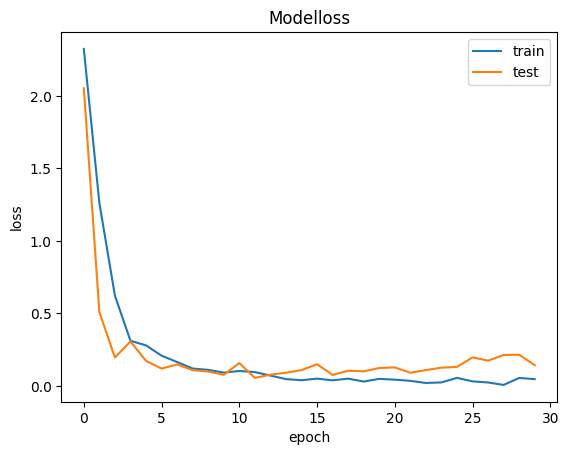

In [ ]:
modelplot(history, 'loss', 'val_loss')

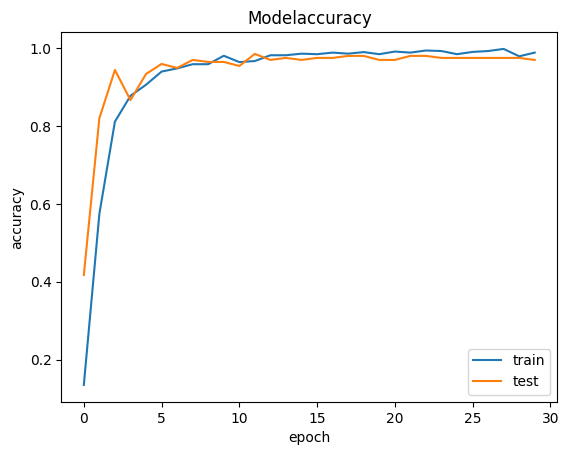

In [ ]:
modelplot(history, 'accuracy', 'val_accuracy')

In [ ]:
# Testing the model on the test set

score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.10716555267572403
Test Accuracy = 0.9411764740943909
